# Factorización mediante QAOA (Quantum Approximate Optimization Algorithm)

## Problema de Factorización

Para enviar un mensaje de un lugar a otro mediante un canal público, el mensaje debe ser encriptado y la llave privada que lo desencripta se mantiene en secreto. Este procedimiento se hace mapeando el mensaje a un número entero y realizando una serie de operaciones matemáticas. La seguridad de este método se basa en que es un problema muy costoso computacionalmente, pues no existe ningún algoritmo clásico que pueda factorizar números primos muy grandes en tiempo polinomial.

En 1994, P. Shor propuso un algoritmo que permite resolver el problema de factorización de números enteros en un computador cuántico en tiempo polinomial. Sin embargo, necesitamos computadores cuánticos más precisos y que no cometan tantos errores, lo cual está lejos de lo que tenemos actualmente. De aquí nace la idea de buscar otro método que pueda resolverlo, dando con QAOA (Quantum Approximate Optimization Algorithm), un algoritmo híbrido clásico-cuántico que consiste en la resolución de un problema de minimización de costos. QAOA posee una etapa que se lleva a cabo con un algoritmo cuántico, y otra etapa que se lleva a cabo con un algoritmo clásico, además no necesita gran cantidad de qubits para que funciones, por lo que es resistente ante errores y decoherencia presente en los computadores cuánticos actuales.

Basándonos en el articulo de Hegade et. al. [[1]](https://arxiv.org/abs/2105.09480), podemos expresar el problema de factorización de la siguiente forma. Sea $N$ un número entero con factores primos $\{x, y\}$, tal que $N - xy = 0$. Definiremos entonces la función de costo

$$
f(x,y) = (N-xy)^2,
$$

donde claramente $f(x,y) \geq 0$ y su mínimo corresponde a $f(x_s,y_s) = 0$ si y solo si $x_s y_s = N$. Si asumimos que $N$ es un número impar, podemos codificar la solución del problema de factorización en el minimo autoestado del Hamiltoniano

$$
H_f = \left[ N I - \left( \sum_{l=1}^{n_x} 2^l \hat{x}_l + I \right)\left( \sum_{m=1}^{n_y} 2^m \hat{y}_m + I \right)  \right]^2, \quad \hat{x}_l = \frac{I- \sigma_l^z}{2}, \ \hat{y}_m = \frac{I- \sigma_m^z}{2}
$$

donde $I$ es el operador identidad, $\sigma_i^z$ es el operador de Pauli-Z actuando sobre el $i$-esimo qubit, $n_x$ y $n_y$ son el número de qubits necesarios para representar los factores primos $\{x, y\}$ en binario.

## QAOA (Quantum Approximate Optimization Algorithm)

El algoritmo QAOA (*Quantum Approximate Optimization Algorithm*) [[2]](https://arxiv.org/abs/1411.4028) corresponde a un algortimo variacional cuántico para resolver problemas combinatoriales. QAOA utiliza una unitaria $U(\boldsymbol{\beta}, \boldsymbol{\gamma})$ caracterizada por los parámetros $(\boldsymbol{\beta}, \boldsymbol{\gamma})$ para preparar el estado cuántico $\lvert \psi(\boldsymbol{\beta}, \boldsymbol{\gamma}) \rangle$ y maximizar una función de coste $F_p(\boldsymbol{\gamma},\boldsymbol{\beta})$ que represente el problema.

La unitaria $U(\boldsymbol{\beta}, \boldsymbol{\gamma})$ esta compuesta a la vez por dos unitarias $U(\boldsymbol{\beta}) = e^{-i \boldsymbol{\beta} H_B}$ y $U(\boldsymbol{\gamma}) = e^{-i \boldsymbol{\gamma} H}$, donde $H_B$ corresponde al Hamiltoniano de mezcla (*mixing*) y $H$ corresponde al Hamiltoniano que representa el problema de optimización.

En general, $H_B$ corresponde a sumas de rotaciones $X$ sobre un único qubit, dado por

$$ H_B = \sum_{i = 1}^n X_i,$$

mientras que $H$ corresponde a un Hamiltoniano diagonal en la base computacional y que cuente con a lo más $m$ términos locales $\hat{C}_k$, 

$$ H = \sum_{k = 1}^m \hat{C}_k = \sum_{x \in \{0,1\}^n} C(x) |x \rangle\langle x|, $$

donde $x \in \{0,1\}^n$ son las etiquetas de la base computacional $|x \rangle \in \mathbb{C}^{2^n}$.

El estado objetivo del algoritmo es preparado aplicando estas unitarias en bloques alternantes $p$ veces

\begin{align*}
\lvert \psi(\boldsymbol{\beta}, \boldsymbol{\gamma}) \rangle &= \underbrace{U(\boldsymbol{\beta}) U(\boldsymbol{\gamma}) 
                                            \cdots U(\boldsymbol{\beta}) U(\boldsymbol{\gamma})}_{p \; \text{veces}} 
\lvert \psi_0 \rangle \\\\
&= e^{ -i\beta_p H_B } e^{ -i\gamma_p H } \ldots e^{ -i\beta_1 H_B } e^{ -i\gamma_1 H } \lvert \psi_0 \rangle 
\end{align*}

donde $\lvert \psi_0 \rangle$ es un estado inicial conveniente, utilizándose típicamente el estado producto $|+\rangle^n = \bigg(\frac{1}{\sqrt{2}}\big(\lvert 0 \rangle + \lvert 1 \rangle\big)\bigg)^{\otimes n}$.

El objetivo del algoritmo es encontrar los parámetros óptimos $(\boldsymbol{\beta}_{opt}, \boldsymbol{\gamma}_{opt})$ tales que el estado cuántico $\lvert \psi(\boldsymbol{\beta}_{opt}, \boldsymbol{\gamma}_{opt}) \rangle$ codifique la solución del problema, lo cuál corresponde a maximizar la función de coste

\begin{align*}
F_p(\boldsymbol{\gamma},\boldsymbol{\beta}) &= \langle \psi_p(\boldsymbol{\gamma},\boldsymbol{\beta})|H|\psi_p(\boldsymbol{\gamma},\boldsymbol{\beta})\rangle\\\\
&= \sum_{x \in \{0,1\}^n} C(x) |\langle x| \psi_p(\boldsymbol{\gamma},\boldsymbol{\beta}) \rangle |^2.
\end{align*}

Dado que el Hamiltoniano $H$ es diagonal en la base computacional, podemos calcular fácilmente el valor de expectación anterior muestreando el estado $| \psi_p(\boldsymbol{\gamma},\boldsymbol{\beta}) \rangle$ en la base computacional.

Para cada cadena de bits $x$ obtenida de las distribución $|\langle x| \psi_p(\boldsymbol{\gamma},\boldsymbol{\beta}) \rangle |^2$, evaluamos la función de coste $C(x)$ y promediamos sobre el número total de muestras (shots).

Los parametros óptimos se obtienen mediante un proceso de optimización clásico. Debido a esto, QAOA se considera un algoritmo híbrido clásico-cuántico.

In [68]:
# Importamos los paquetes necesarios

import numpy as np
import matplotlib.pyplot as plt 
from qiskit.quantum_info import SparsePauliOp

### Inicialización

In [2]:
# Función auxiliar que expresa un numero entero en su representacion binaria

def int2bin( integer, num_bits=None):
    if num_bits is None:
        return bin(integer)[2:]
    else:
        return bin(integer)[2:].zfill(num_bits)

int2bin(5,1)

'101'

Primero, definiremos el número de qubits necesarios para cada registro. Para ello, consideraremos como ejemplo un algoritmo que sea capaz de factorizar $35 = 5 \cdot 7$. 

In [70]:
x = 5
y = 7
N  = x*y

# Numero de qubits necesarios

nx = np.int32( np.ceil( np.log2(x) ) ) - 1
ny = np.int32( np.ceil( np.log2(y) ) ) - 1

num_qubits = nx + ny

print('Número de qubits para el registro x = '+str(nx))
print('Número de qubits para el registro y = '+str(ny))
print('Número total de qubits = '+str(num_qubits))

Número de qubits para el registro x = 2
Número de qubits para el registro y = 2
Número total de qubits = 4


In [71]:
# Definimos la funcion operador x_l

def bit_operator( num_qubits, qubit ):
    I = num_qubits * 'I'
    Z = num_qubits * ['I']
    Z[num_qubits-qubit-1] = 'Z'
    Z = "".join(Z)   
    return SparsePauliOp.from_list( [ ( I, 0.5), ( Z, -0.5 ) ] )

bit_operator(num_qubits,0)

SparsePauliOp(['IIII', 'IIIZ'],
              coeffs=[ 0.5+0.j, -0.5+0.j])

In [72]:
# Funcion operador identidad num_qubits

def Identity( num_qubits ):
    return SparsePauliOp.from_list([ (num_qubits*'I',1)])

Identity(num_qubits)

SparsePauliOp(['IIII'],
              coeffs=[1.+0.j])

**Ejercicio 1:** Utilizando las funciones definidas anteriormente, construya el Hamiltoniano $H_f$.

Hint: Construya primero el operador

$$
X = \sum_{l=1}^{n_x} 2^l \hat{x}_l + I
$$

Repita el mismo proceso para construir

$$
Y = \sum_{m=1}^{n_y} 2^l \hat{y}_m + I
$$



Para elevar al cuadrado el Hamiltoniano, puede utilizar la funcion `@`, tal que `H_XY @ H_XY = H_f`.

In [73]:
# Construir operador x

x_op = Identity(nx)
for l in range(nx):

    x_op += 2**(l+1)*bit_operator(nx,l)

In [74]:
# Construit operador y

y_op = Identity(ny)
for m in range(ny):
    y_op += 2**(m+1)*bit_operator(ny,m)

In [75]:
# Construir hamiltoniano

H = N*Identity(nx+ny) - (x_op ^ y_op)
H = H@H
H

SparsePauliOp(['IIII', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'IZII', 'IZII', 'IZIZ', 'IZII', 'IZZI', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'ZIII', 'ZIII', 'ZIIZ', 'ZIII', 'ZIZI', 'IIII', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'IZII', 'IZII', 'IZIZ', 'IZII', 'IZZI', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'ZIII', 'ZIII', 'ZIIZ', 'ZIII', 'ZIZI', 'IIII', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'IZII', 'IZII', 'IZIZ', 'IZII', 'IZZI', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'ZIII', 'ZIII', 'ZIIZ', 'ZIII', 'ZIZI', 'IIIZ', 'IIIZ', 'IIIZ', 'IIII', 'IIIZ', 'IIZZ', 'IIIZ', 'IIIZ', 'IIII', 'IIIZ', 'IIZZ', 'IZIZ', 'IZIZ', 'IZII', 'IZIZ', 'IZZZ', 'IIIZ', 'IIIZ', 'IIII', 'IIIZ', 'IIZZ', 'ZIIZ', 'ZIIZ', 'ZIII', 'ZIIZ', 'ZIZZ', 'IIII', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'IIII', 'IIII', 'IIIZ', 'IIII', 'IIZI', 'IZII', 'IZII', 'IZIZ', 'IZII', 'IZZI', 'IIII', 'IIII', 'IIIZ', '

In [76]:
# Para simplificar el Hamiltoniano, podemos combinar los coeficientes repetidos con simplify

H = H.simplify()
H

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'IZIZ', 'IZZI', 'ZIII', 'ZIIZ', 'ZIZI', 'IIZZ', 'IZZZ', 'ZIZZ', 'ZZII', 'ZZIZ', 'ZZZI', 'ZZZZ'],
              coeffs=[546.+0.j, 112.+0.j, 224.+0.j, 112.+0.j,  -6.+0.j, -12.+0.j, 224.+0.j,
 -12.+0.j, -24.+0.j,  84.+0.j, -32.+0.j, -64.+0.j,  84.+0.j, -32.+0.j,
 -64.+0.j,  16.+0.j])

Podemos expresar el Hamiltoniano como una matriz para visualizar directamente sus autovalores respecto a cada elemento de la base computacional

In [77]:
from IPython.display import display, Math

def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))
    
print_matrix(H.to_matrix().real)

<IPython.core.display.Math object>

Para asegurarnos que nuestro Hamiltoniano codifica de manera correcta nuestro problema, podemos comparar el autoestado obtenido resolviendo el problema tanto de forma clásica como cuántica.

In [78]:
# Depecrated, usar qiskit-algorithms (debe instalarse en caso de usarse)

# Calculamos los autovalores de forma clásica

from qiskit.algorithms.eigensolvers import NumPyEigensolver

NumPyEigensolver().compute_eigenvalues(H).eigenvalues

array([0.+0.j])

In [79]:
# Representaciones binarias de x,y

bin_x = int2bin(x,nx+1)[:-1]
print(str(x)+' en representacion binaria es '+bin_x)

bin_y = int2bin(y,ny+1)[:-1] 
print(str(y)+' en representacion binaria es '+bin_y)

state_minimum1 = bin_x + bin_y
print('Estado de minima energía 5x7 = '+state_minimum1)

state_minimum2 = bin_y + bin_x
print('Estado de minima energía 7x5 = '+state_minimum2)

5 en representacion binaria es 10
7 en representacion binaria es 11
Estado de minima energía 5x7 = 1011
Estado de minima energía 7x5 = 1110


Construimos un circuito que represente el estado de minima energía $|1011\rangle$.

C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


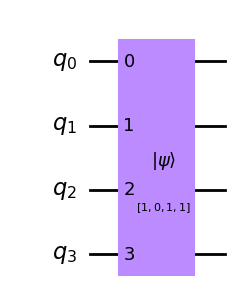

In [80]:
from qiskit import QuantumCircuit

qc_minimum = QuantumCircuit( nx+ny )
qc_minimum.initialize( state_minimum1 )  # cambiar
qc_minimum.draw('mpl')

Calculamos el valor de expectacion de nuestro Hamiltoniano, siendo este el mismo resultado que el obtenido clásicamente.

In [81]:
from qiskit.primitives import Estimator

estimator = Estimator()
estimator.run( qc_minimum, H ).result().values

array([0.])

**Ejercicio 2:** Construya un circuito que corresponda al estado inicial $|+\rangle^n = \bigg(\frac{1}{\sqrt{2}}\big(\lvert 0 \rangle + \lvert 1 \rangle\big)\bigg)^{\otimes n}$.


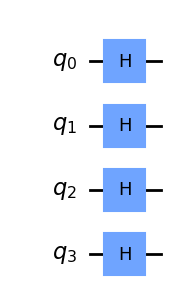

In [82]:
init_state = QuantumCircuit(nx+ny)
init_state.h(range(nx+ny))
init_state.draw('mpl')

**Ejercicio 3:** Construya un circuito que implemente la unitaria $U(\boldsymbol{\beta}) = e^{-i \boldsymbol{\beta} H_B}$, donde $H_B$ es el Hamiltoniano de mezcla $ H_B = \sum_{i = 1}^n X_i$. Para ello defina una función `unitaria_HB` que reciba el parámetro $\beta$ y el número de qubits y entregue un circuito al cual se le aplicó $U(\beta)$.

Hint: Los términos individuales en la suma de $H_B$ commutan entre ellos, por lo que podemos utilizar la fórmula de Baker-Campbell-Hausdorff para escribir las unitarias como

$$ 
U(H_B) = e^{-i \beta H_B} = \prod_{i=1}^n e^{-i \beta X_i}.
$$

¿Qué compuerta de `qiskit` implementa una rotación en el eje $x$?

In [83]:
def unitaria_HB(beta, num_qubits):
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        qc.rx(2*beta,i)
    return qc

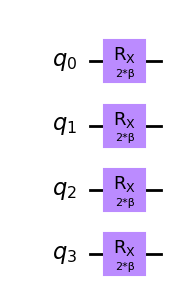

In [84]:
from qiskit.circuit import Parameter

beta = Parameter('β')  # Solo para visualizacion
U_HB = unitaria_HB(beta, num_qubits)
U_HB.draw('mpl')

### Optimización clásica

Qiskit cuenta con una función dedicada a la implementación del algoritmo QAOA llamada [`QAOAAnsatz`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.QAOAAnsatz). Nosotros consideraremos los siguientes cuatro inputs:

-  `cost_operator`: Corresponde al Hamiltoniano que representa nuestro problema de optimización.
-  `reps`: El número de veces que repetimos la unitaria $U(\boldsymbol{\beta}, \boldsymbol{\gamma})$.
-  `mixer_operator`: El operador de mezcla (por defecto corresponde a la unitaria de mezcla que definimos anteriormente)
-  `initial_state`: El estado inicial (por defecto es $|+\rangle^n$)

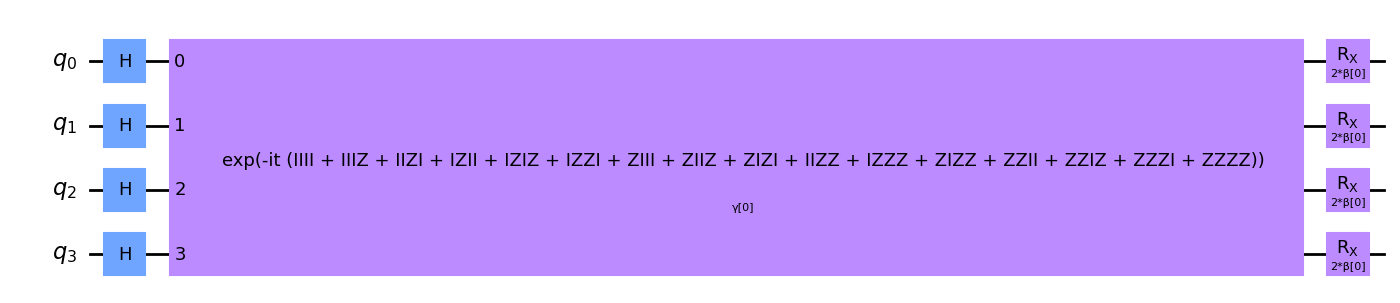

In [85]:
from qiskit.circuit.library import QAOAAnsatz

ansatz = QAOAAnsatz(H, reps=1, mixer_operator=U_HB, initial_state=init_state)
ansatz.decompose(reps=1).draw('mpl')  # Aumentar el valor de reps para descomponer el circuito

**Ejercicio 4:** Cree la función objetivo a partir del circuito QAOA. Esta función debe tener como input el objeto `params`, y debe entregar el valor de expectación del Hamiltoniano $H_f$.

Hint: Anteriormente calculamos el valor de expectación del Hamiltoniano para un estado en particular. En este caso, necesitamos primero asignar lo parámetros al circuito utilizando el método [`assign_parameters`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#assign_parameters).

In [86]:
def obj_fun( params ):
   ansatz_with_params = ansatz.assign_parameters(params)
   results = estimator.run(ansatz_with_params,H).result()
   return results.values
    

In [87]:
# Valor de expectacion usando parametros iniciales aleatorios

obj_fun(np.random.random(ansatz.num_parameters))

array([583.54719113])

Finalmente, ejecutamos el proceso de optimización para encontrar los parámetros que minimizan el autoestado del Hamiltoniano. Para esto, necesitamos elegir:

-  El número de repeticiones. Entre mayor sea este número, mejora la calidad de los resultados, pero a costa de un circuito más profundo.

-  El algoritmo de optimización.

In [88]:
# Existen distintos algoritmos de optimización disponibles en qiskit

from qiskit.algorithms.optimizers import COBYLA, SPSA, GradientDescent, POWELL

# Elegimos un numero de repeticiones adecuado

reps = 3  # se propone manipular
ansatz = QAOAAnsatz( H, reps=reps, initial_state = init_state, mixer_operator = U_HB)

In [89]:
params_per_iter = []

# Definimos el optimizador clásico
# Guardamos los resultados en cada iteración mediante la función callback (varía dependiendo del optimizador)

callback = lambda intermediate_result: params_per_iter.append( intermediate_result.x)
optimizer = POWELL(callback=callback)

# Optimizamos

initial_param = np.zeros(ansatz.num_parameters)

results = optimizer.minimize( obj_fun, initial_param)
opt_params = results.x

results.__dict__

{'_x': array([-1.16058056, -1.13755814,  0.17350792, -1.13130588, -2.14411422,
         0.43417966]),
 '_fun': array(125.78350499),
 '_jac': None,
 '_nfev': 709,
 '_njev': None,
 '_nit': 8}

Text(0, 0.5, 'Costo')

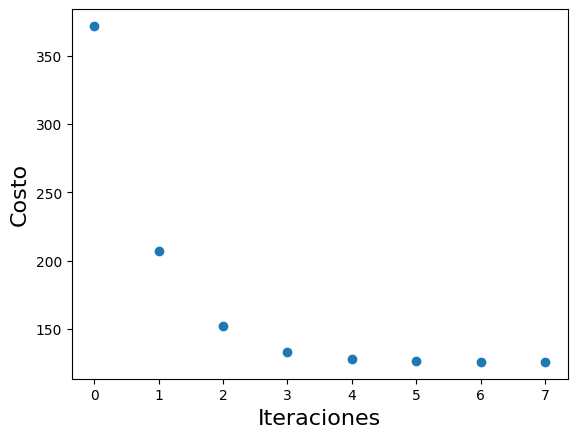

In [90]:
# Evaluamos la función objetivo para cada set de parámetros por iteración

fun_per_iter = [ obj_fun(params) for params in params_per_iter ] 

plt.plot(fun_per_iter, 'o')
plt.xlabel('Iteraciones', fontsize=16)
plt.ylabel('Costo', fontsize=16)

Para visualizar la solución otorgada por QAOA, ejecutamos el algoritmo con los parámetros óptimos y dibujamos la distribucion de probabilidad.

C:\Users\fabia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


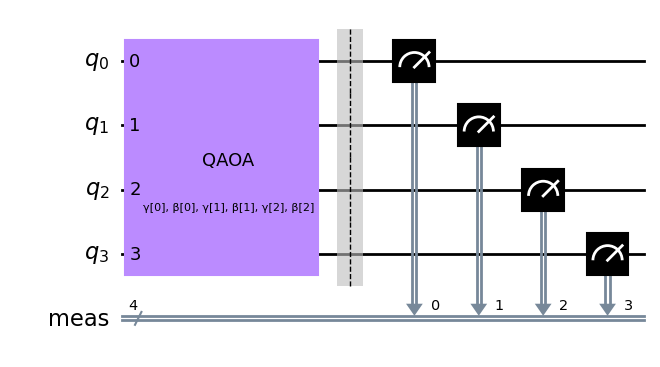

In [91]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_distribution

sampler = Sampler()

ansatz_with_measures = ansatz.copy()
ansatz_with_measures.measure_all()
ansatz_with_measures.draw('mpl') 

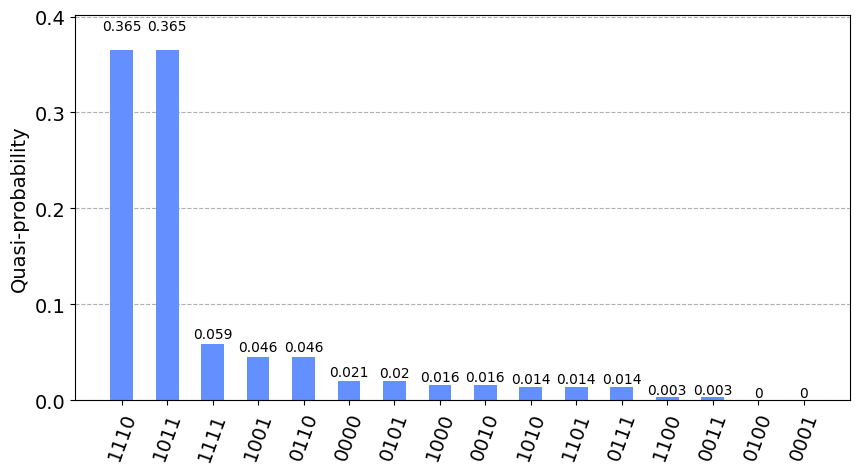

In [92]:
sampler_results = sampler.run( ansatz_with_measures, opt_params).result()

probs = sampler_results.quasi_dists[0].binary_probabilities()
plot_distribution( probs , figsize=(10, 5), sort='value_desc')

Recordemos que las dos posibles soluciones son $1011$ y $1110$, por lo que encontramos la solución correcta con alta probabilidad.

**Ejercicio 5/Tarea:** Modifique el código anterior, juegue con algunos parámetros y resuelva el problema de factorización para $N = 33$, utilizando un circuito lo menos profundo posible.

# Referencias

[[1]](https://arxiv.org/abs/2105.09480) Hegade, Paul, Albarrán-Arriagada, Chen, Solano. "Digitized Adiabatic Quantum Factorization." arXiv preprint arXiv:2105.09480 (2021).

[[2]](https://arxiv.org/abs/1411.4028) Farhi, Edward, Jeffrey Goldstone, and Sam Gutmann. "A quantum approximate optimization algorithm." arXiv preprint arXiv:1411.4028 (2014).

[Qiskit Tutorial](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm)

In [94]:
import qiskit.tools.jupyter
%qiskit_version_table